In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [18]:
acao=yf.Ticker("AAPL")


In [19]:
acao.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [23]:
acao=yf.Ticker("AAPL")
hist = acao.history(period='max')
labels=list(np.array(hist.index))
values=list(np.array(hist))

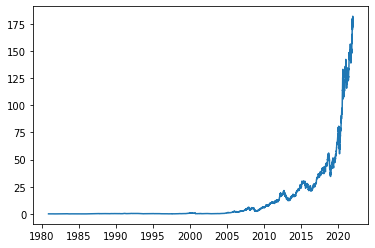

In [24]:
plt.plot(hist['Close'])

In [25]:
print(np.array(hist.index, dtype='datetime64[D]').astype(str))

['1980-12-12' '1980-12-15' '1980-12-16' ... '2022-01-07' '2022-01-10'
 '2022-01-11']


In [26]:
tax_rate=acao.financials.loc['Income Tax Expense']/acao.financials.loc['Income Before Tax']

FCF2=acao.cashflow.loc['Total Cash From Operating Activities']+acao.cashflow.loc['Capital Expenditures']


In [27]:
acao.financials
ROC=(acao.financials.loc['Ebit']*(1-tax_rate))/(acao.balancesheet.loc['Total Stockholder Equity']+acao.balancesheet.loc['Long Term Debt']+acao.balancesheet.loc['Cash'])

In [28]:

q_cash_flow_statement = acao.quarterly_cashflow
q_cash_flow_statement = q_cash_flow_statement.iloc[:,:4] # extract for last 4 quarters


q_cash_flow_statement.iloc[:]

,2021-09-25,2021-06-26,2021-03-27,2020-12-26
Investments,4.608000e+09,5.747000e+09,-7.895000e+09,-5.279000e+09
Change To Liabilities,1.405000e+10,3.070000e+08,-2.336600e+10,2.301100e+10
Total Cashflows From Investing Activities,8.350000e+08,3.572000e+09,-1.036800e+10,-8.584000e+09
Net Borrowings,3.220000e+09,3.220000e+09,1.042300e+10,-9.780000e+08
Total Cash From Financing Activities,-2.038200e+10,-2.939600e+10,-1.132600e+10,-3.224900e+10
Change To Operating Activities,-5.602000e+09,-6.048000e+09,1.126500e+10,-5.761000e+09
Issuance Of Stock,5.440000e+08,5.440000e+08,5.610000e+08,5.610000e+08
Net Income,2.055100e+10,2.174400e+10,2.363000e+10,2.875500e+10
Change In Cash,6.530000e+08,-4.730000e+09,2.287000e+09,-2.070000e+09
Repurchase Of Stock,-2.044900e+10,-2.559500e+10,-1.884700e+10,-2.763600e+10


Extraction de donnés de Finviz

In [31]:
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']
ticker="AAPL"
import requests
from bs4 import BeautifulSoup as bs
def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 175.08,
 'EPS next 5Y': 15.68,
 'Beta': 1.21,
 'Shs Outstand': 16489999999.999998}

Calcule du Beta

In [32]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  7.5


Discounted Cash Flows

Year 1: $86478283125.58139
Year 2: $80454567925.1688
Year 3: $74850439510.06494
Year 4: $69636671221.21501
Year 5: $64786072206.28983
Year 6: $60302273348.47776
Year 7: $56128795081.38312
Year 8: $52244160333.425064
Year 9: $48628378446.16291
Year 10: $45262842300.67963
Year 11: $42121811569.860374
Year 12: $39198753762.31471
Year 13: $36478542570.99502
Year 14: $33947101384.207832
Year 15: $31591330441.63862
Year 16: $29399039045.409557
Year 17: $27358882475.374626
Year 18: $25460303282.19979
Year 19: $23693476654.43039
Year 20: $22049259576.829918


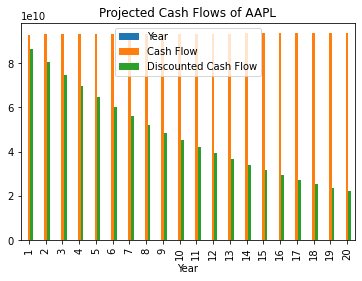

In [33]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value

cash_flow=FCF2[0]
total_debt=acao.balancesheet.loc['Long Term Debt'][0]+acao.balancesheet.loc['Short Long Term Debt'][0]
cash_and_ST_investments=acao.balancesheet.loc['Cash'][0]
EPS_growth_5Y=0.012
EPS_growth_6Y_to_10Y=0.06
EPS_growth_11Y_to_20Y=0.04
shares_outstanding=finviz_data['Shs Outstand']
intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)  

In [34]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100) 

Intrinsic Value:  52.53438352102545
Current Price:  175.08
Margin of Safety:  -233.26744936471755


etapas do código:
1. Somar free cash flow dos 4 últimos meses para ter o TTM
2. Obter cash flows de anos anteriores somente para plotar e verificar se são estáveis
3. balanço do trimestre mais recente: total debt e cash and short term investments
4. Infos obtidas do Finviz: Price, EPS next 5y, Beta, Shs Outstand
5. Joga na função de calcular o intrisic value
